<a href="https://colab.research.google.com/github/hawa1983/DATA-602/blob/main/DATA_608_HW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Step 1: Mount Google Drive and Import Libraries

In [ ]:
# Step 1: Mount Google Drive to access the CSV file
from google.colab import drive
#drive.mount('/content/drive')

# Step 2: Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Patch


# Step 2: Load and Preprocess Data

In [ ]:
# Step 3: Load the CSV file (adjust the path as needed)
file_path = '/content/IIJA FUNDING AS OF MARCH 2023.csv'
data = pd.read_csv(file_path)

# Step 4: Create a dictionary to map full state names to their abbreviations
state_abbreviations = {
    'Alabama': 'AL', 'Alaska': 'AK', 'Arizona': 'AZ', 'Arkansas': 'AR', 'California': 'CA',
    'Colorado': 'CO', 'Connecticut': 'CT', 'Delaware': 'DE', 'District of Columbia': 'DC', 'Florida': 'FL',
    'Georgia': 'GA', 'Hawaii': 'HI', 'Idaho': 'ID', 'Illinois': 'IL', 'Indiana': 'IN',
    'Iowa': 'IA', 'Kansas': 'KS', 'Kentucky': 'KY', 'Louisiana': 'LA', 'Maine': 'ME',
    'Maryland': 'MD', 'Massachusetts': 'MA', 'Michigan': 'MI', 'Minnesota': 'MN', 'Mississippi': 'MS',
    'Missouri': 'MO', 'Montana': 'MT', 'Nebraska': 'NE', 'Nevada': 'NV', 'New Hampshire': 'NH',
    'New Jersey': 'NJ', 'New Mexico': 'NM', 'New York': 'NY', 'North Carolina': 'NC', 'North Dakota': 'ND',
    'Ohio': 'OH', 'Oklahoma': 'OK', 'Oregon': 'OR', 'Pennsylvania': 'PA', 'Rhode Island': 'RI',
    'South Carolina': 'SC', 'South Dakota': 'SD', 'Tennessee': 'TN', 'Texas': 'TX', 'Utah': 'UT',
    'Vermont': 'VT', 'Virginia': 'VA', 'Washington': 'WA', 'West Virginia': 'WV', 'Wisconsin': 'WI',
    'Wyoming': 'WY'
}

# Replace full state names with abbreviations
data['State'] = data['State'].map(state_abbreviations)


# Plot 1: Dot Plot of Per Capita Funding by State

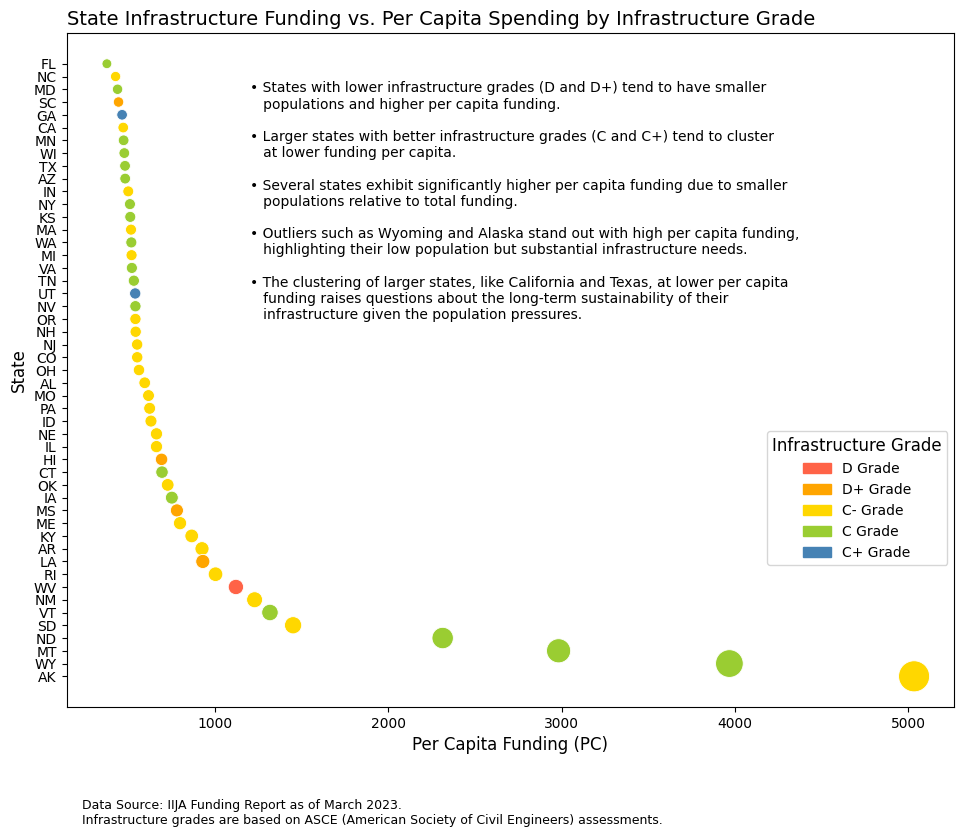

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Patch

# Define a consistent color palette for the grades
grade_colors = {
    'D': '#FF6347',   # Tomato Red for Grade D
    'D+': '#FFA500',  # Orange for Grade D+
    'C-': '#FFD700',  # Gold for Grade C-
    'C': '#9ACD32',   # YellowGreen for Grade C
    'C+': '#4682B4'   # Steel Blue for Grade C+
}

# Assign colors based on the Grade
data['color'] = data['Grade'].map(grade_colors)

# Step 5: Plot 1 - Dot plot of Per Capita Funding by State (Abbreviations)
plt.figure(figsize=(10, 8))

# Scatter plot with color based on the 'Grade' column and size based on 'PC' (Per Capita Funding)
sns.scatterplot(x='PC', y='State', data=data, hue='Grade', palette=grade_colors, size='PC', sizes=(50, 500), legend=False)

# Simplify title
plt.title('State Infrastructure Funding vs. Per Capita Spending by Infrastructure Grade', fontsize=14, loc='left')

# Keep axes labels shorter
plt.xlabel('Per Capita Funding (PC)', fontsize=12)
plt.ylabel('State', fontsize=12)

# Adding footnotes as text in the plot
footnotes = (
    "Data Source: IIJA Funding Report as of March 2023.\n"
    "Infrastructure grades are based on ASCE (American Society of Civil Engineers) assessments."
)

# Position footnotes and use smaller text size to minimize clutter
plt.figtext(0.1, -0.05, footnotes, ha="left", fontsize=9, wrap=True)

# Create a custom legend for the grades
legend_labels = [Patch(color=grade_colors[grade], label=f'{grade} Grade') for grade in grade_colors]
plt.legend(handles=legend_labels, loc='lower right', bbox_to_anchor=(1.0, 0.2), title='Infrastructure Grade', fontsize=10, title_fontsize=12)

# Step 6: Insert bulletized analysis in the middle without a border
analysis_text = (
    "• States with lower infrastructure grades (D and D+) tend to have smaller\n"
    "   populations and higher per capita funding.\n\n"
    "• Larger states with better infrastructure grades (C and C+) tend to cluster\n"
    "   at lower funding per capita.\n\n"
    "• Several states exhibit significantly higher per capita funding due to smaller\n"
    "   populations relative to total funding.\n\n"
    "• Outliers such as Wyoming and Alaska stand out with high per capita funding,\n"
    "   highlighting their low population but substantial infrastructure needs.\n\n"
    "• The clustering of larger states, like California and Texas, at lower per capita\n"
    "   funding raises questions about the long-term sustainability of their\n"
    "   infrastructure given the population pressures."
)
# Move the text further left by decreasing the x-value
plt.text(1200, 20, analysis_text, fontsize=10)  # Adjusted x-coordinate to move text left

# Add some padding between plot and footnotes
plt.tight_layout(pad=2.0)

# Display the plot
plt.show()


# Plot 3: Scatter Plot of Total Funding vs Population

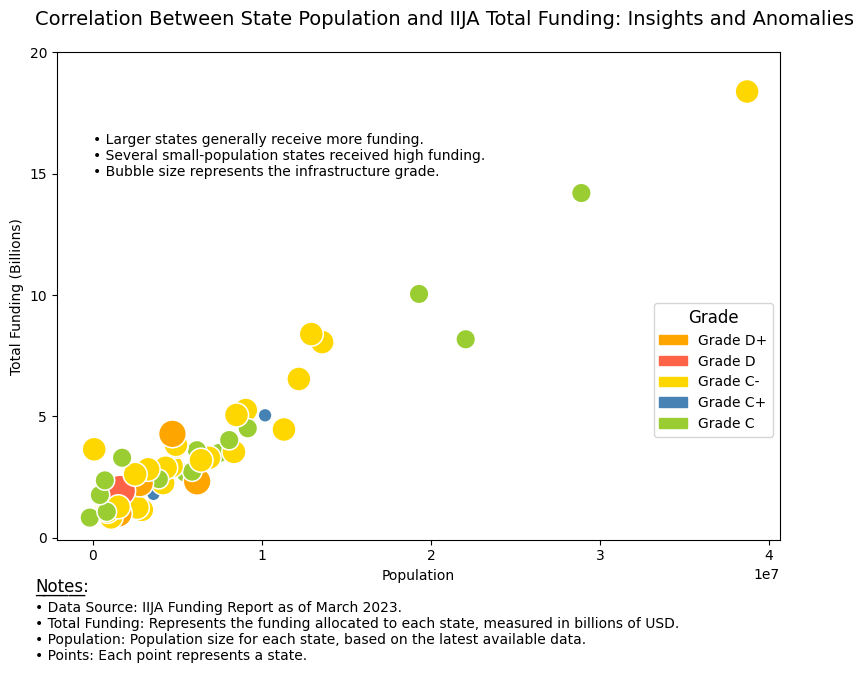

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from matplotlib.patches import Patch

# Step 1: Define the ranges for the 'Grade' and use these for bubble size
grade_size_mapping = {
    'D': 500,     # Largest bubbles for D grade
    'D+': 400,
    'C-': 300,
    'C': 200,
    'C+': 100      # Smallest bubbles for C+ grade
}

# Map sizes based on Grade
data['Grade_Size'] = data['Grade'].map(grade_size_mapping)

# Step 2: Define custom colors for each grade and sort them in ascending order of grade
grade_colors = {
    'D': '#FF6347',   # Tomato Red for Grade D
    'D+': '#FFA500',  # Orange for Grade D+
    'C-': '#FFD700',  # Gold for Grade C-
    'C': '#9ACD32',   # YellowGreen for Grade C
    'C+': '#4682B4'   # Steel Blue for Grade C+
}

# Sort grades in ascending order (lower grade = better infrastructure)
sorted_grades = sorted(grade_colors.keys(), reverse=True)

# Map colors based on Grade
data['Grade_Color'] = data['Grade'].map(grade_colors)

# Apply jitter by slightly modifying the x and y values
jitter_strength = 0.05  # Increase this value to add more jitter
data['Population_jittered'] = data['Population'] + np.random.normal(0, jitter_strength * 1e7, len(data))
data['Total_jittered'] = data['Total (Billions)'] + np.random.normal(0, jitter_strength, len(data))

# Step 3: Plot the scatter plot with color and size based on Grade
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Population_jittered', y='Total_jittered', hue='Grade', data=data, size='Grade_Size', sizes=(100, 500), palette=grade_colors)

# Keep the axis labels
plt.xlabel('Population')
plt.ylabel('Total Funding (Billions)')

# Add infrequent tick marks (sparse)
plt.xticks([0, 1e7, 2e7, 3e7, 4e7])  # X-axis ticks for Population (every 10 million)
plt.yticks([0, 5, 10, 15, 20])  # Y-axis ticks for Total Funding (every 5 billion)

# Ensure the spines (the plot boundaries) are visible
for spine in plt.gca().spines.values():
    spine.set_visible(True)

# Step 4: Add concise bulleted analysis in the plot area
plt.text(0.9, 15,
    '• Larger states generally receive more funding.\n'
    '• Several small-population states received high funding.\n'
    '• Bubble size represents the infrastructure grade.',
    wrap=True, fontsize=10, horizontalalignment='left')

# Step 5: Add left-justified footnotes at the bottom of the figure
plt.figtext(0.05, -0.1,
    '• Data Source: IIJA Funding Report as of March 2023.\n'
    '• Total Funding: Represents the funding allocated to each state, measured in billions of USD.\n'
    '• Population: Population size for each state, based on the latest available data.\n'
    '• Points: Each point represents a state.',
    wrap=True, horizontalalignment='left', fontsize=10)

# Step 6: Add underlined title atop the footnote
plt.figtext(0.05, 0.01,
    'Notes:',
    wrap=True, horizontalalignment='left', fontsize=12)

# Underline the title using a horizontal line
plt.figtext(0.05, 0.01, '______', fontsize=12, horizontalalignment='left')

# Plot title with left justification
plt.suptitle('Correlation Between State Population and IIJA Total Funding: Insights and Anomalies', x=0.05, ha='left', fontsize=14)

# Step 7: Create a custom legend for the colors (Grade legend), sorted by grade
legend_labels = [Patch(color=grade_colors[grade], label=f"Grade {grade}") for grade in sorted_grades]
plt.legend(handles=legend_labels, title='Grade', loc='upper right', bbox_to_anchor=(1, 0.5), fontsize=10, title_fontsize=12)

# Step 8: Display the plot with the footnotes, title, and analysis
plt.tight_layout()
plt.show()


# Plot 4: Bar Chart for Infrastructure Grades with Count Annotations

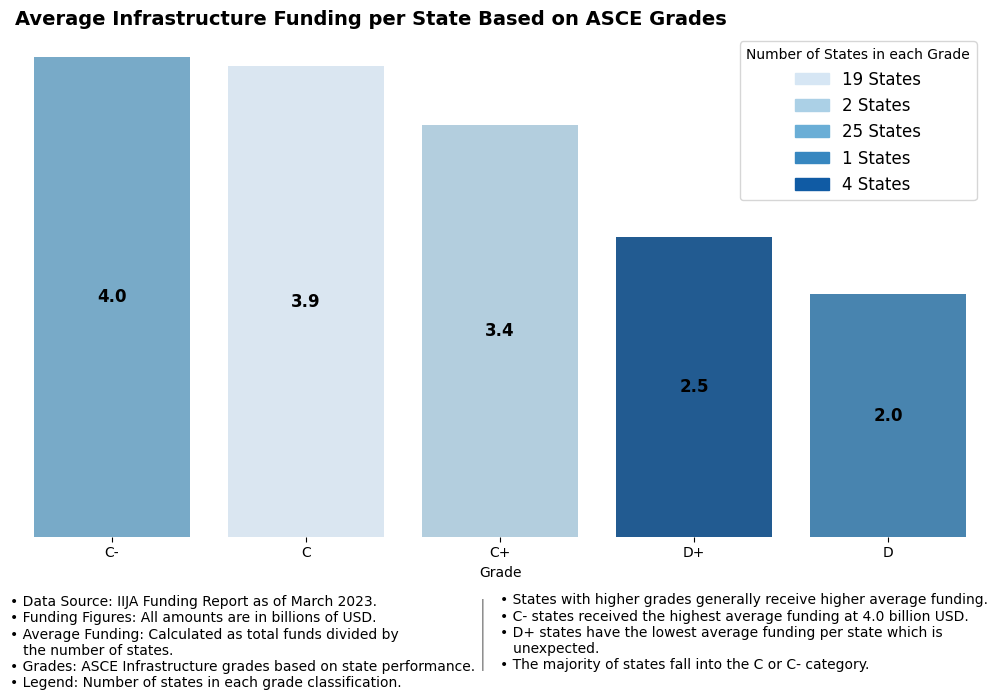

In [ ]:
# Step 9: Create a new DataFrame for average spending per grade
avg_spending = data.groupby('Grade')['Total (Billions)'].mean().reset_index()

# Step 10: Create a new DataFrame for the number of states per grade
state_count = data['Grade'].value_counts().reset_index()
state_count.columns = ['Grade', 'Count']  # Rename columns to Grade and Count


# Step 11: Merge the two DataFrames on the 'Grade' column
merged_data = pd.merge(avg_spending, state_count, on='Grade')

# Step 12: Order the bars by spending from highest to lowest
grade_order = merged_data.sort_values(by='Total (Billions)', ascending=False)['Grade']

# Step 13: Bar chart for the distribution of average spending by grade
plt.figure(figsize=(10, 6))

# Plot the average spending per state in each grade using hue to avoid the warning
palette = sns.color_palette('Blues', len(grade_order))  # Generate the color palette
ax = sns.barplot(x='Grade', y='Total (Billions)', data=merged_data, hue='Grade', order=grade_order, palette=palette, legend=False)

# Add title aligned with the left edge of the chart
ax.set_title('Average Infrastructure Funding per State Based on ASCE Grades', fontsize=14, loc='left', fontweight='bold')

# Remove y-axis ticks and labels
ax.set(yticks=[], ylabel=None)

# Remove spines (borders)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Add spending values to the bars, centered vertically and horizontally
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}',
                (p.get_x() + p.get_width() / 2., p.get_height() / 2),  # Center the text
                ha='center', va='center', fontsize=12, color='black', fontweight='bold')

# Step 14: Create a custom legend with the number of states for each grade
legend_labels = [f'{row["Count"]} States' for _, row in merged_data.iterrows()]
legend_colors = [Patch(color=palette[i], label=legend_labels[i]) for i in range(len(legend_labels))]

# Add the custom legend ordered according to the bars
plt.legend(handles=legend_colors, loc='upper right', fontsize=12, title='Number of States in each Grade')

# Step 14: Add a taller vertical line between the footnotes and analysis
plt.figtext(0.48, -0.03, '|', fontsize=12, color='grey')  # Top part
plt.figtext(0.48, -0.06, '|', fontsize=12, color='grey')  # Top part
plt.figtext(0.48, -0.09, '|', fontsize=12, color='grey')  # Middle part
plt.figtext(0.48, -0.12, '|', fontsize=12, color='grey')  # Bottom part


# Step 16: Add left-justified footnotes at the bottom of the figure
plt.figtext(0.01, -0.15,
    '• Data Source: IIJA Funding Report as of March 2023.\n'
    '• Funding Figures: All amounts are in billions of USD.\n'
    '• Average Funding: Calculated as total funds divided by\n   the number of states.\n'
    '• Grades: ASCE Infrastructure grades based on state performance.\n'
    '• Legend: Number of states in each grade classification.',
    wrap=True, horizontalalignment='left', fontsize=10)

# Step 17: Add bulletized analysis to the right of the footnotes
plt.figtext(0.5, -0.12,
    '• States with higher grades generally receive higher average funding.\n'
    '• C- states received the highest average funding at 4.0 billion USD.\n'
    '• D+ states have the lowest average funding per state which is\n   unexpected.\n'
    '• The majority of states fall into the C or C- category.',
    wrap=True, horizontalalignment='left', fontsize=10)

# Display the plot with the footnotes, title, and analysis
plt.tight_layout()
plt.show()


# Plot 6: Average Per Capita Spending in each Grade

<ipython-input-97-b36371cad9f5>:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Grade', y='PC', data=merged_data, order=grade_order, palette=palette, dodge=False)


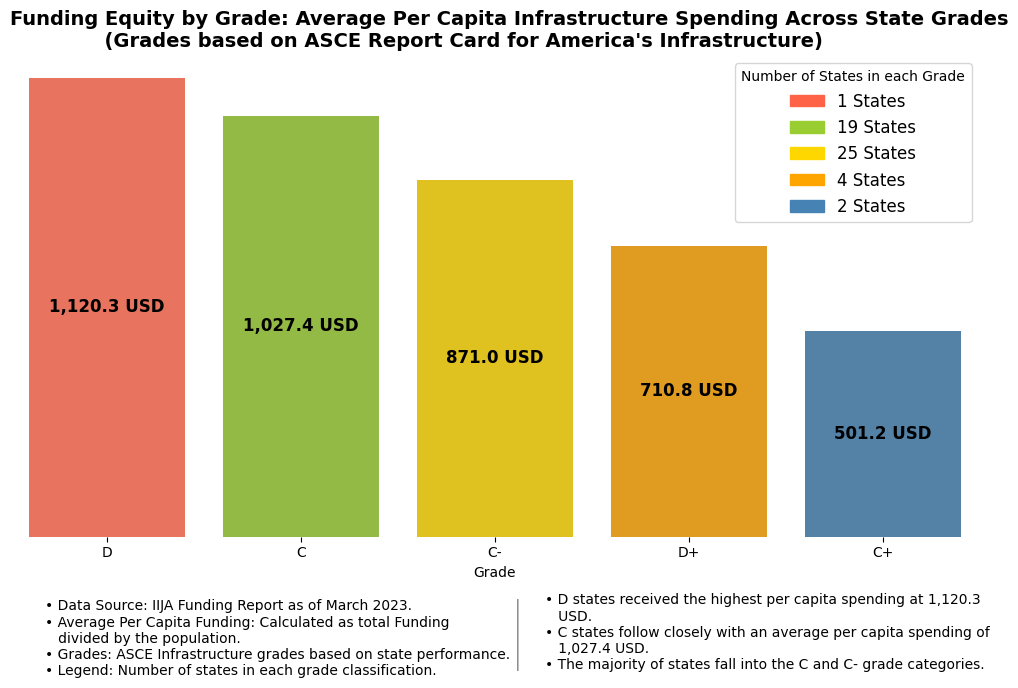

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Patch

# Step 9: Create a new DataFrame for average spending per grade
avg_per_capita_spending = data.groupby("Grade")["PC"].mean().reset_index()

# Merge the two DataFrames on the 'Grade' column
merged_data = pd.merge(avg_per_capita_spending, state_count, on='Grade')

# Order the bars by per capita spending from highest to lowest
merged_data = merged_data.sort_values(by='PC', ascending=False)
grade_order = merged_data['Grade']  # Now 'Grade' is sorted by PC

# Define a consistent color palette for the grades
grade_colors = {
    'D': '#FF6347',   # Tomato Red for Grade D
    'D+': '#FFA500',  # Orange for Grade D+
    'C-': '#FFD700',  # Gold for Grade C-
    'C': '#9ACD32',   # YellowGreen for Grade C
    'C+': '#4682B4'   # Steel Blue for Grade C+
}

# Create a list of colors corresponding to the grade order
palette = [grade_colors[grade] for grade in grade_order]

# Bar chart for the distribution of average per capita spending by grade
plt.figure(figsize=(10, 6))

# Plot the average per capita spending per state in each grade using hue
ax = sns.barplot(x='Grade', y='PC', data=merged_data, order=grade_order, palette=palette, dodge=False)

# Add title aligned with the left edge of the chart
ax.set_title("Funding Equity by Grade: Average Per Capita Infrastructure Spending Across State Grades\n              (Grades based on ASCE Report Card for America's Infrastructure)", fontsize=14, loc='left', fontweight='bold')

# Remove y-axis ticks and labels
ax.set(yticks=[], ylabel=None)

# Remove spines (borders)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Add per capita spending values to the bars, centered vertically and horizontally
for p in ax.patches:
    ax.annotate(f'{p.get_height():,.1f} USD',
                (p.get_x() + p.get_width() / 2., p.get_height() / 2),  # Center the text
                ha='center', va='center', fontsize=12, color='black', fontweight='bold')

# Add footnotes at the bottom of the chart (left side) aligned horizontally with the analysis
plt.figtext(0.05, -0.13,
    '• Data Source: IIJA Funding Report as of March 2023.\n'
    '• Average Per Capita Funding: Calculated as total Funding\n   divided by the population.\n'
    '• Grades: ASCE Infrastructure grades based on state performance.\n'
    '• Legend: Number of states in each grade classification.',
    wrap=True, horizontalalignment='left', fontsize=10)

# Add bulletized analysis summary to the right of the footnotes (aligned horizontally)
plt.figtext(0.55, -0.12,
    '• D states received the highest per capita spending at 1,120.3\n   USD.\n'
    '• C states follow closely with an average per capita spending of\n   1,027.4 USD.\n'
    '• The majority of states fall into the C and C- grade categories.',
    wrap=True, horizontalalignment='left', fontsize=10)

# Add a taller vertical line between the footnotes and analysis
plt.figtext(0.52, -0.03, '|', fontsize=12, color='grey')  # Top part
plt.figtext(0.52, -0.06, '|', fontsize=12, color='grey')  # Top part
plt.figtext(0.52, -0.09, '|', fontsize=12, color='grey')  # Middle part
plt.figtext(0.52, -0.12, '|', fontsize=12, color='grey')  # Bottom part

# Create a custom legend with the number of states for each grade
legend_labels = [f'{row["Count"]} States' for _, row in merged_data.iterrows()]
legend_colors = [Patch(color=palette[i], label=legend_labels[i]) for i in range(len(legend_labels))]

# Add the custom legend ordered according to the bars
plt.legend(handles=legend_colors, loc='upper right', fontsize=12, title='Number of States in each Grade')

# Display the plot with the footnotes, vertical line, and summary analysis
plt.tight_layout()
plt.show()


Map

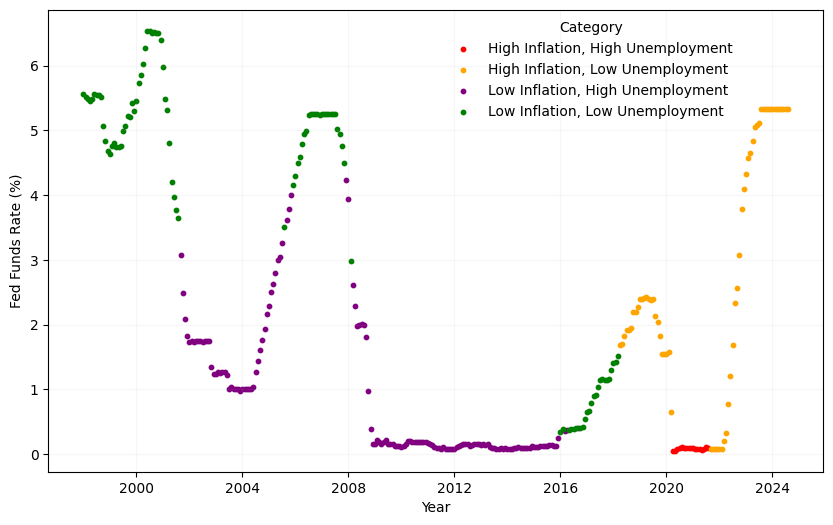

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the datasets
cpi_df = pd.read_csv('/content/CPI_not_seasonally_adjusted.csv')
fed_rate_df = pd.read_csv('/content/FED FUNDS RATE.csv')
unemployment_df = pd.read_csv('/content/Unemployment_rate.csv')

# Reshape CPI data to long format and handle special cases
cpi_long = pd.melt(cpi_df, id_vars='Year', var_name='Month', value_name='CPI')
cpi_long = cpi_long[~cpi_long['Month'].isin(['HALF1', 'HALF2'])]
cpi_long['Date'] = pd.to_datetime(cpi_long['Year'].astype(str) + '-' + cpi_long['Month'], format='%Y-%b')

# Reshape Unemployment data to long format
unemployment_long = pd.melt(unemployment_df, id_vars='Year', var_name='Month', value_name='Unemployment Rate')
unemployment_long['Date'] = pd.to_datetime(unemployment_long['Year'].astype(str) + '-' + unemployment_long['Month'], format='%Y-%b')

# Convert the DATE column in fed_rate_df to datetime64[ns]
fed_rate_df['DATE'] = pd.to_datetime(fed_rate_df['DATE'])

# Merge datasets
merged_df = pd.merge(cpi_long, unemployment_long[['Date', 'Unemployment Rate']], on='Date')
merged_df = pd.merge(merged_df, fed_rate_df[['DATE', 'FEDFUNDS']], left_on='Date', right_on='DATE')
merged_df.drop(columns=['DATE', 'Year', 'Month'], inplace=True)

# Define categories based on CPI and Unemployment Rate
def categorize(row):
    if row['CPI'] > 250 and row['Unemployment Rate'] < 5:
        return 'High Inflation, Low Unemployment'
    elif row['CPI'] > 250 and row['Unemployment Rate'] >= 5:
        return 'High Inflation, High Unemployment'
    elif row['CPI'] <= 250 and row['Unemployment Rate'] >= 5:
        return 'Low Inflation, High Unemployment'
    else:
        return 'Low Inflation, Low Unemployment'

merged_df['Category'] = merged_df.apply(categorize, axis=1)

# Create a color map based on the categories
color_map = {
    'Low Inflation, Low Unemployment': 'green',
    'Low Inflation, High Unemployment': 'purple',
    'High Inflation, Low Unemployment': 'orange',
    'High Inflation, High Unemployment': 'red'
}

# Create a color column based on the category
merged_df['Color'] = merged_df['Category'].map(color_map)

# Plot the Fed Funds Rate over time with categories highlighted using dots
plt.figure(figsize=(10, 6))
for category, group in merged_df.groupby('Category'):
    plt.scatter(group['Date'], group['FEDFUNDS'], color=color_map[category], label=category, s=10)

plt.xlabel('Year')
plt.ylabel('Fed Funds Rate (%)')

# Adjust legend location to the center of the plot and remove the border
plt.legend(title='Category', loc='center', bbox_to_anchor=(0.7, 0.87), frameon=False)

# Fade out the grid lines by setting alpha to a lower value
plt.grid(True, alpha=0.1)

plt.show()


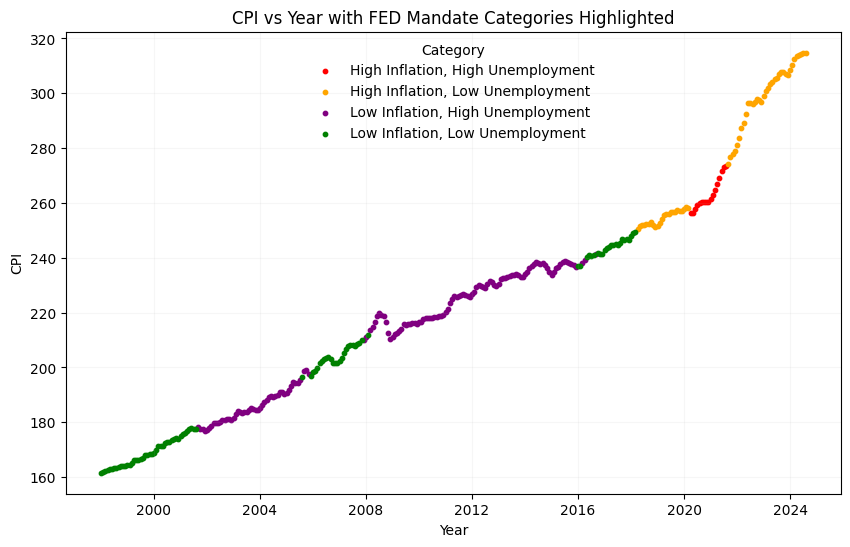

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the datasets
cpi_df = pd.read_csv('/content/CPI_not_seasonally_adjusted.csv')
fed_rate_df = pd.read_csv('/content/FED FUNDS RATE.csv')
unemployment_df = pd.read_csv('/content/Unemployment_rate.csv')

# Reshape CPI data to long format and handle special cases
cpi_long = pd.melt(cpi_df, id_vars='Year', var_name='Month', value_name='CPI')
cpi_long = cpi_long[~cpi_long['Month'].isin(['HALF1', 'HALF2'])]
cpi_long['Date'] = pd.to_datetime(cpi_long['Year'].astype(str) + '-' + cpi_long['Month'], format='%Y-%b')

# Reshape Unemployment data to long format
unemployment_long = pd.melt(unemployment_df, id_vars='Year', var_name='Month', value_name='Unemployment Rate')
unemployment_long['Date'] = pd.to_datetime(unemployment_long['Year'].astype(str) + '-' + unemployment_long['Month'], format='%Y-%b')

# Convert the DATE column in fed_rate_df to datetime64[ns]
fed_rate_df['DATE'] = pd.to_datetime(fed_rate_df['DATE'])

# Merge datasets
merged_df = pd.merge(cpi_long, unemployment_long[['Date', 'Unemployment Rate']], on='Date')
merged_df = pd.merge(merged_df, fed_rate_df[['DATE', 'FEDFUNDS']], left_on='Date', right_on='DATE')
merged_df.drop(columns=['DATE', 'Year', 'Month'], inplace=True)

# Define categories based on CPI and Unemployment Rate
def categorize(row):
    if row['CPI'] > 250 and row['Unemployment Rate'] < 5:
        return 'High Inflation, Low Unemployment'
    elif row['CPI'] > 250 and row['Unemployment Rate'] >= 5:
        return 'High Inflation, High Unemployment'
    elif row['CPI'] <= 250 and row['Unemployment Rate'] >= 5:
        return 'Low Inflation, High Unemployment'
    else:
        return 'Low Inflation, Low Unemployment'

merged_df['Category'] = merged_df.apply(categorize, axis=1)

# Create a color map based on the categories
color_map = {
    'Low Inflation, Low Unemployment': 'green',
    'Low Inflation, High Unemployment': 'purple',
    'High Inflation, Low Unemployment': 'orange',
    'High Inflation, High Unemployment': 'red'
}

# Create a color column based on the category
merged_df['Color'] = merged_df['Category'].map(color_map)

# Plot CPI over time with categories highlighted using dots
plt.figure(figsize=(10, 6))
for category, group in merged_df.groupby('Category'):
    plt.scatter(group['Date'], group['CPI'], color=color_map[category], label=category, s=10)

plt.xlabel('Year')
plt.ylabel('CPI')
plt.title('CPI vs Year with FED Mandate Categories Highlighted')

# Adjust legend location to the center of the plot and remove the border
plt.legend(title='Category', loc='center', bbox_to_anchor=(0.5, 0.87), frameon=False)

# Fade out the grid lines by setting alpha to a lower value
plt.grid(True, alpha=0.1)

plt.show()


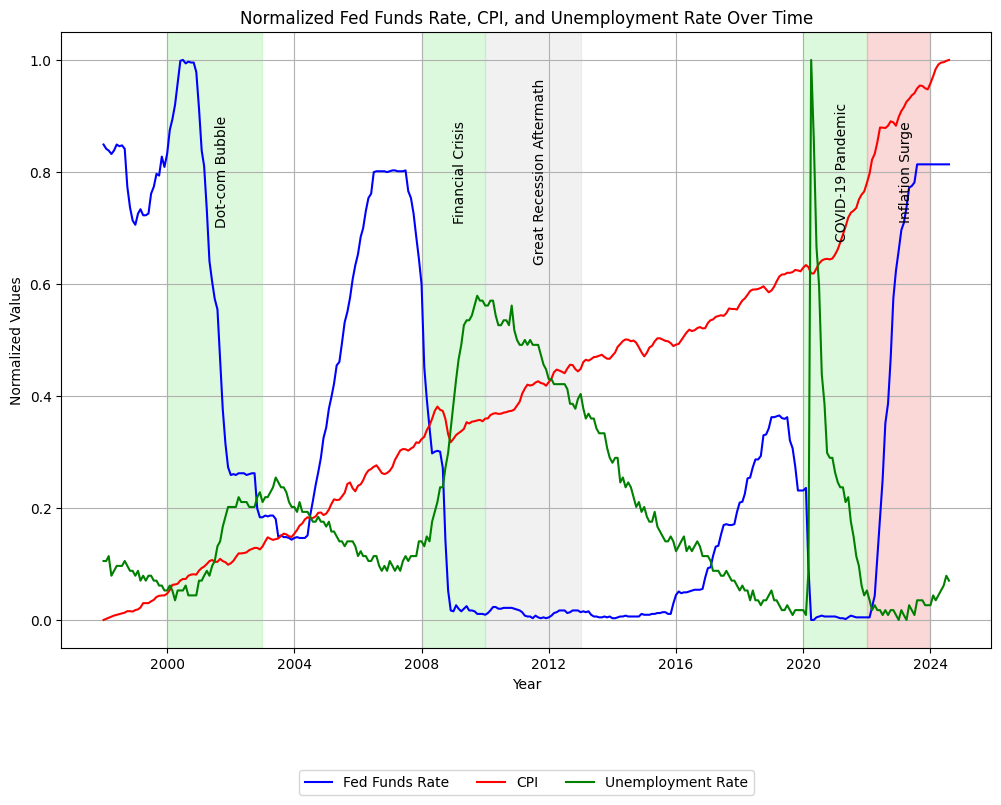

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Load the datasets
cpi_df = pd.read_csv('/content/CPI_not_seasonally_adjusted.csv')
fed_rate_df = pd.read_csv('/content/FED FUNDS RATE.csv')
unemployment_df = pd.read_csv('/content/Unemployment_rate.csv')

# Reshape CPI data to long format and handle special cases
cpi_long = pd.melt(cpi_df, id_vars='Year', var_name='Month', value_name='CPI')
cpi_long = cpi_long[~cpi_long['Month'].isin(['HALF1', 'HALF2'])]
cpi_long['Date'] = pd.to_datetime(cpi_long['Year'].astype(str) + '-' + cpi_long['Month'], format='%Y-%b')

# Reshape Unemployment data to long format
unemployment_long = pd.melt(unemployment_df, id_vars='Year', var_name='Month', value_name='Unemployment Rate')
unemployment_long['Date'] = pd.to_datetime(unemployment_long['Year'].astype(str) + '-' + unemployment_long['Month'], format='%Y-%b')

# Convert the DATE column in fed_rate_df to datetime64[ns]
fed_rate_df['DATE'] = pd.to_datetime(fed_rate_df['DATE'])

# Merge datasets
merged_df = pd.merge(cpi_long, unemployment_long[['Date', 'Unemployment Rate']], on='Date')
merged_df = pd.merge(merged_df, fed_rate_df[['DATE', 'FEDFUNDS']], left_on='Date', right_on='DATE')
merged_df.drop(columns=['DATE', 'Year', 'Month'], inplace=True)

# Sort the DataFrame by Date to ensure proper line plotting
merged_df = merged_df.sort_values(by='Date')

# Normalize the Fed Funds Rate, CPI, and Unemployment Rate using MinMaxScaler
scaler = MinMaxScaler()
merged_df[['FEDFUNDS', 'CPI', 'Unemployment Rate']] = scaler.fit_transform(merged_df[['FEDFUNDS', 'CPI', 'Unemployment Rate']])

# Create a normalized combined plot
plt.figure(figsize=(12, 8))

# Plot each series with a single line
plt.plot(merged_df['Date'], merged_df['FEDFUNDS'], color='blue', label='Fed Funds Rate')
plt.plot(merged_df['Date'], merged_df['CPI'], color='red', label='CPI')
plt.plot(merged_df['Date'], merged_df['Unemployment Rate'], color='green', label='Unemployment Rate')

# Add highlights
highlight_periods = [
    ('2000-01-01', '2002-12-31', 'Dot-com Bubble', 'lightgreen'),
    ('2008-01-01', '2009-12-31', 'Financial Crisis', 'lightgreen'),
    ('2010-01-01', '2012-12-31', 'Great Recession Aftermath', 'lightgrey'),
    ('2020-01-01', '2021-12-31', 'COVID-19 Pandemic', 'lightgreen'),
    ('2022-01-01', '2024-01-01', 'Inflation Surge', 'lightcoral')
]

for start, end, label, color in highlight_periods:
    plt.axvspan(pd.to_datetime(start), pd.to_datetime(end), color=color, alpha=0.3)
    plt.text(pd.to_datetime(start) + (pd.to_datetime(end) - pd.to_datetime(start)) / 2,
             0.8, label, rotation=90, verticalalignment='center')

# Set labels and title
plt.xlabel('Year')
plt.ylabel('Normalized Values')
plt.title('Normalized Fed Funds Rate, CPI, and Unemployment Rate Over Time')
plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.25), ncol=3)

# Add a border around the plot
plt.gca().spines['top'].set_visible(True)
plt.gca().spines['right'].set_visible(True)
plt.gca().spines['bottom'].set_visible(True)
plt.gca().spines['left'].set_visible(True)

# Show the plot
plt.grid(True)
plt.show()


<ipython-input-7-4aa3c7ada4a1>:16: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  cpi_long['YoY_Change'] = cpi_long['CPI'].pct_change(12) * 100


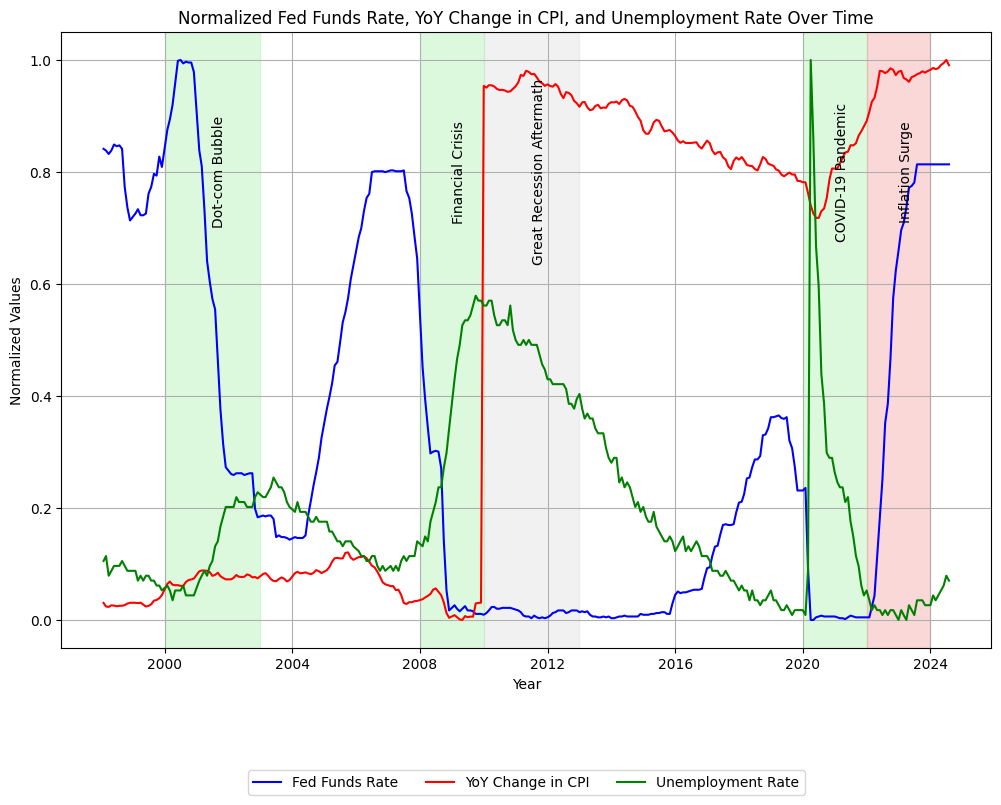

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Load the datasets
cpi_df = pd.read_csv('/content/CPI_not_seasonally_adjusted.csv')
fed_rate_df = pd.read_csv('/content/FED FUNDS RATE.csv')
unemployment_df = pd.read_csv('/content/Unemployment_rate.csv')

# Reshape CPI data to long format and handle special cases
cpi_long = pd.melt(cpi_df, id_vars='Year', var_name='Month', value_name='CPI')
cpi_long = cpi_long[~cpi_long['Month'].isin(['HALF1', 'HALF2'])]
cpi_long['Date'] = pd.to_datetime(cpi_long['Year'].astype(str) + '-' + cpi_long['Month'], format='%Y-%b')

# Calculate YoY percentage change for CPI
cpi_long['YoY_Change'] = cpi_long['CPI'].pct_change(12) * 100

# Drop rows where YoY_Change is NaN (first 12 months won't have YoY change)
cpi_long = cpi_long.dropna(subset=['YoY_Change'])

# Reshape Unemployment data to long format
unemployment_long = pd.melt(unemployment_df, id_vars='Year', var_name='Month', value_name='Unemployment Rate')
unemployment_long['Date'] = pd.to_datetime(unemployment_long['Year'].astype(str) + '-' + unemployment_long['Month'], format='%Y-%b')

# Convert the DATE column in fed_rate_df to datetime64[ns]
fed_rate_df['DATE'] = pd.to_datetime(fed_rate_df['DATE'])

# Merge datasets
merged_df = pd.merge(cpi_long[['Date', 'YoY_Change']], unemployment_long[['Date', 'Unemployment Rate']], on='Date')
merged_df = pd.merge(merged_df, fed_rate_df[['DATE', 'FEDFUNDS']], left_on='Date', right_on='DATE')
merged_df.drop(columns=['DATE'], inplace=True)

# Sort the DataFrame by Date to ensure proper line plotting
merged_df = merged_df.sort_values(by='Date')

# Normalize the Fed Funds Rate, YoY Change in CPI, and Unemployment Rate using MinMaxScaler
scaler = MinMaxScaler()
merged_df[['FEDFUNDS', 'YoY_Change', 'Unemployment Rate']] = scaler.fit_transform(merged_df[['FEDFUNDS', 'YoY_Change', 'Unemployment Rate']])

# Create a normalized combined plot
plt.figure(figsize=(12, 8))

# Plot each series with a single line
plt.plot(merged_df['Date'], merged_df['FEDFUNDS'], color='blue', label='Fed Funds Rate')
plt.plot(merged_df['Date'], merged_df['YoY_Change'], color='red', label='YoY Change in CPI')
plt.plot(merged_df['Date'], merged_df['Unemployment Rate'], color='green', label='Unemployment Rate')

# Add highlights
highlight_periods = [
    ('2000-01-01', '2002-12-31', 'Dot-com Bubble', 'lightgreen'),
    ('2008-01-01', '2009-12-31', 'Financial Crisis', 'lightgreen'),
    ('2010-01-01', '2012-12-31', 'Great Recession Aftermath', 'lightgrey'),
    ('2020-01-01', '2021-12-31', 'COVID-19 Pandemic', 'lightgreen'),
    ('2022-01-01', '2024-01-01', 'Inflation Surge', 'lightcoral')
]

for start, end, label, color in highlight_periods:
    plt.axvspan(pd.to_datetime(start), pd.to_datetime(end), color=color, alpha=0.3)
    plt.text(pd.to_datetime(start) + (pd.to_datetime(end) - pd.to_datetime(start)) / 2,
             0.8, label, rotation=90, verticalalignment='center')

# Set labels and title
plt.xlabel('Year')
plt.ylabel('Normalized Values')
plt.title('Normalized Fed Funds Rate, YoY Change in CPI, and Unemployment Rate Over Time')
plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.25), ncol=3)

# Add a border around the plot
plt.gca().spines['top'].set_visible(True)
plt.gca().spines['right'].set_visible(True)
plt.gca().spines['bottom'].set_visible(True)
plt.gca().spines['left'].set_visible(True)

# Show the plot
plt.grid(True)
plt.show()


<ipython-input-8-e3d4ea500942>:16: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  cpi_long['YoY_Change_CPI'] = cpi_long['CPI'].pct_change(12) * 100
<ipython-input-8-e3d4ea500942>:26: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  unemployment_long['YoY_Change_Unemployment'] = unemployment_long['Unemployment Rate'].pct_change(12) * 100


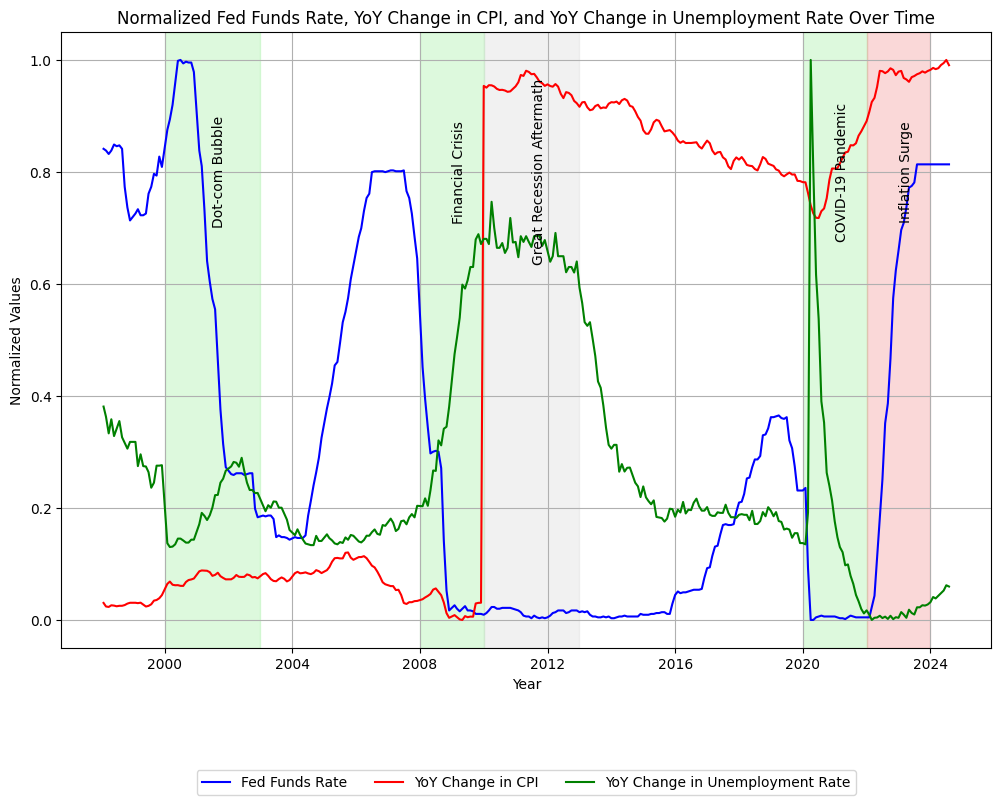

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Load the datasets
cpi_df = pd.read_csv('/content/CPI_not_seasonally_adjusted.csv')
fed_rate_df = pd.read_csv('/content/FED FUNDS RATE.csv')
unemployment_df = pd.read_csv('/content/Unemployment_rate.csv')

# Reshape CPI data to long format and handle special cases
cpi_long = pd.melt(cpi_df, id_vars='Year', var_name='Month', value_name='CPI')
cpi_long = cpi_long[~cpi_long['Month'].isin(['HALF1', 'HALF2'])]
cpi_long['Date'] = pd.to_datetime(cpi_long['Year'].astype(str) + '-' + cpi_long['Month'], format='%Y-%b')

# Calculate YoY percentage change for CPI
cpi_long['YoY_Change_CPI'] = cpi_long['CPI'].pct_change(12) * 100

# Drop rows where YoY_Change_CPI is NaN (first 12 months won't have YoY change)
cpi_long = cpi_long.dropna(subset=['YoY_Change_CPI'])

# Reshape Unemployment data to long format
unemployment_long = pd.melt(unemployment_df, id_vars='Year', var_name='Month', value_name='Unemployment Rate')
unemployment_long['Date'] = pd.to_datetime(unemployment_long['Year'].astype(str) + '-' + unemployment_long['Month'], format='%Y-%b')

# Calculate YoY percentage change for Unemployment Rate
unemployment_long['YoY_Change_Unemployment'] = unemployment_long['Unemployment Rate'].pct_change(12) * 100

# Drop rows where YoY_Change_Unemployment is NaN (first 12 months won't have YoY change)
unemployment_long = unemployment_long.dropna(subset=['YoY_Change_Unemployment'])

# Convert the DATE column in fed_rate_df to datetime64[ns]
fed_rate_df['DATE'] = pd.to_datetime(fed_rate_df['DATE'])

# Merge datasets
merged_df = pd.merge(cpi_long[['Date', 'YoY_Change_CPI']], unemployment_long[['Date', 'YoY_Change_Unemployment']], on='Date')
merged_df = pd.merge(merged_df, fed_rate_df[['DATE', 'FEDFUNDS']], left_on='Date', right_on='DATE')
merged_df.drop(columns=['DATE'], inplace=True)

# Sort the DataFrame by Date to ensure proper line plotting
merged_df = merged_df.sort_values(by='Date')

# Normalize the Fed Funds Rate, YoY Change in CPI, and YoY Change in Unemployment Rate using MinMaxScaler
scaler = MinMaxScaler()
merged_df[['FEDFUNDS', 'YoY_Change_CPI', 'YoY_Change_Unemployment']] = scaler.fit_transform(merged_df[['FEDFUNDS', 'YoY_Change_CPI', 'YoY_Change_Unemployment']])

# Create a normalized combined plot
plt.figure(figsize=(12, 8))

# Plot each series with a single line
plt.plot(merged_df['Date'], merged_df['FEDFUNDS'], color='blue', label='Fed Funds Rate')
plt.plot(merged_df['Date'], merged_df['YoY_Change_CPI'], color='red', label='YoY Change in CPI')
plt.plot(merged_df['Date'], merged_df['YoY_Change_Unemployment'], color='green', label='YoY Change in Unemployment Rate')

# Add highlights
highlight_periods = [
    ('2000-01-01', '2002-12-31', 'Dot-com Bubble', 'lightgreen'),
    ('2008-01-01', '2009-12-31', 'Financial Crisis', 'lightgreen'),
    ('2010-01-01', '2012-12-31', 'Great Recession Aftermath', 'lightgrey'),
    ('2020-01-01', '2021-12-31', 'COVID-19 Pandemic', 'lightgreen'),
    ('2022-01-01', '2024-01-01', 'Inflation Surge', 'lightcoral')
]

for start, end, label, color in highlight_periods:
    plt.axvspan(pd.to_datetime(start), pd.to_datetime(end), color=color, alpha=0.3)
    plt.text(pd.to_datetime(start) + (pd.to_datetime(end) - pd.to_datetime(start)) / 2,
             0.8, label, rotation=90, verticalalignment='center')

# Set labels and title
plt.xlabel('Year')
plt.ylabel('Normalized Values')
plt.title('Normalized Fed Funds Rate, YoY Change in CPI, and YoY Change in Unemployment Rate Over Time')
plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.25), ncol=3)

# Add a border around the plot
plt.gca().spines['top'].set_visible(True)
plt.gca().spines['right'].set_visible(True)
plt.gca().spines['bottom'].set_visible(True)
plt.gca().spines['left'].set_visible(True)

# Show the plot
plt.grid(True)
plt.show()


<ipython-input-9-fbf492946f7a>:17: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  cpi_long['YoY_Change_CPI'] = cpi_long['CPI'].pct_change(12) * 100
<ipython-input-9-fbf492946f7a>:25: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  unemployment_long['YoY_Change_Unemployment'] = unemployment_long['Unemployment Rate'].pct_change(12) * 100


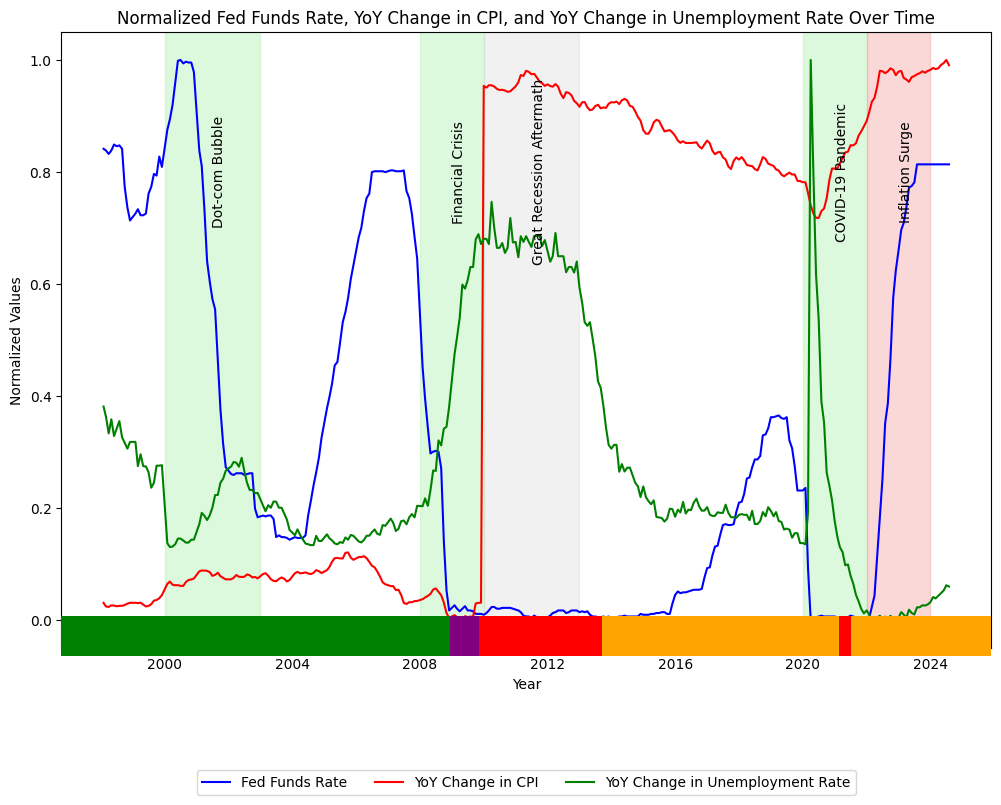

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Load the datasets
cpi_df = pd.read_csv('/content/CPI_not_seasonally_adjusted.csv')
fed_rate_df = pd.read_csv('/content/FED FUNDS RATE.csv')
unemployment_df = pd.read_csv('/content/Unemployment_rate.csv')

# Reshape CPI data to long format and handle special cases
cpi_long = pd.melt(cpi_df, id_vars='Year', var_name='Month', value_name='CPI')
cpi_long = cpi_long[~cpi_long['Month'].isin(['HALF1', 'HALF2'])]
cpi_long['Date'] = pd.to_datetime(cpi_long['Year'].astype(str) + '-' + cpi_long['Month'], format='%Y-%b')

# Calculate YoY percentage change for CPI
cpi_long['YoY_Change_CPI'] = cpi_long['CPI'].pct_change(12) * 100
cpi_long = cpi_long.dropna(subset=['YoY_Change_CPI'])

# Reshape Unemployment data to long format
unemployment_long = pd.melt(unemployment_df, id_vars='Year', var_name='Month', value_name='Unemployment Rate')
unemployment_long['Date'] = pd.to_datetime(unemployment_long['Year'].astype(str) + '-' + unemployment_long['Month'], format='%Y-%b')

# Calculate YoY percentage change for Unemployment Rate
unemployment_long['YoY_Change_Unemployment'] = unemployment_long['Unemployment Rate'].pct_change(12) * 100
unemployment_long = unemployment_long.dropna(subset=['YoY_Change_Unemployment'])

# Convert the DATE column in fed_rate_df to datetime64[ns]
fed_rate_df['DATE'] = pd.to_datetime(fed_rate_df['DATE'])

# Merge datasets
merged_df = pd.merge(cpi_long[['Date', 'YoY_Change_CPI']], unemployment_long[['Date', 'YoY_Change_Unemployment']], on='Date')
merged_df = pd.merge(merged_df, fed_rate_df[['DATE', 'FEDFUNDS']], left_on='Date', right_on='DATE')
merged_df.drop(columns=['DATE'], inplace=True)
merged_df = merged_df.sort_values(by='Date')

# Normalize the Fed Funds Rate, YoY Change in CPI, and YoY Change in Unemployment Rate using MinMaxScaler
scaler = MinMaxScaler()
merged_df[['FEDFUNDS', 'YoY_Change_CPI', 'YoY_Change_Unemployment']] = scaler.fit_transform(merged_df[['FEDFUNDS', 'YoY_Change_CPI', 'YoY_Change_Unemployment']])

# Define categories based on CPI and Unemployment Rate
def categorize(row):
    if row['YoY_Change_CPI'] > 0.5 and row['YoY_Change_Unemployment'] > 0.5:
        return 'High Inflation, High Unemployment'
    elif row['YoY_Change_CPI'] > 0.5 and row['YoY_Change_Unemployment'] <= 0.5:
        return 'High Inflation, Low Unemployment'
    elif row['YoY_Change_CPI'] <= 0.5 and row['YoY_Change_Unemployment'] > 0.5:
        return 'Low Inflation, High Unemployment'
    else:
        return 'Low Inflation, Low Unemployment'

merged_df['Category'] = merged_df.apply(categorize, axis=1)

# Create a color map based on the categories
color_map = {
    'Low Inflation, Low Unemployment': 'green',
    'Low Inflation, High Unemployment': 'purple',
    'High Inflation, Low Unemployment': 'orange',
    'High Inflation, High Unemployment': 'red'
}

merged_df['Category_Color'] = merged_df['Category'].map(color_map)

# Create the plot
fig, ax1 = plt.subplots(figsize=(12, 8))

# Plot each time series
ax1.plot(merged_df['Date'], merged_df['FEDFUNDS'], color='blue', label='Fed Funds Rate')
ax1.plot(merged_df['Date'], merged_df['YoY_Change_CPI'], color='red', label='YoY Change in CPI')
ax1.plot(merged_df['Date'], merged_df['YoY_Change_Unemployment'], color='green', label='YoY Change in Unemployment Rate')

# Add highlights
highlight_periods = [
    ('2000-01-01', '2002-12-31', 'Dot-com Bubble', 'lightgreen'),
    ('2008-01-01', '2009-12-31', 'Financial Crisis', 'lightgreen'),
    ('2010-01-01', '2012-12-31', 'Great Recession Aftermath', 'lightgrey'),
    ('2020-01-01', '2021-12-31', 'COVID-19 Pandemic', 'lightgreen'),
    ('2022-01-01', '2024-01-01', 'Inflation Surge', 'lightcoral')
]

for start, end, label, color in highlight_periods:
    ax1.axvspan(pd.to_datetime(start), pd.to_datetime(end), color=color, alpha=0.3)
    ax1.text(pd.to_datetime(start) + (pd.to_datetime(end) - pd.to_datetime(start)) / 2,
             0.8, label, rotation=90, verticalalignment='center')

# Set labels and title
ax1.set_xlabel('Year')
ax1.set_ylabel('Normalized Values')
ax1.set_title('Normalized Fed Funds Rate, YoY Change in CPI, and YoY Change in Unemployment Rate Over Time')
ax1.legend(loc='lower center', bbox_to_anchor=(0.5, -0.25), ncol=3)

# Add a border around the plot
for spine in ax1.spines.values():
    spine.set_visible(True)

# Create heatmap strip at the bottom for the categories
heatmap_height = 0.05
ax2 = fig.add_axes([0.125, 0.1, 0.775, heatmap_height])  # [left, bottom, width, height]
for i in range(len(merged_df) - 1):
    ax2.axvspan(merged_df['Date'].iloc[i], merged_df['Date'].iloc[i+1], color=merged_df['Category_Color'].iloc[i], lw=0)
ax2.set_xlim([merged_df['Date'].min(), merged_df['Date'].max()])
ax2.axis('off')

plt.show()


<ipython-input-25-facc8e982a79>:18: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  cpi_long['YoY_Change_CPI'] = cpi_long['CPI'].pct_change(12) * 100
<ipython-input-25-facc8e982a79>:26: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  unemployment_long['YoY_Change_Unemployment'] = unemployment_long['Unemployment Rate'].pct_change(12) * 100


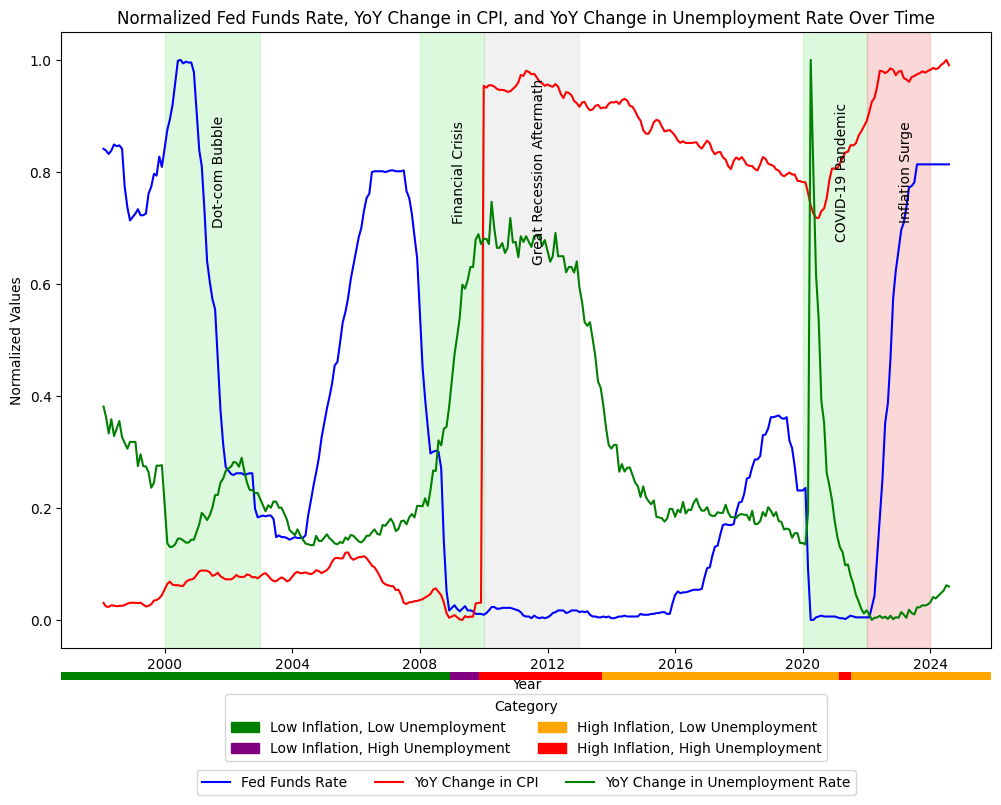

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from matplotlib.patches import Patch

# Load the datasets
cpi_df = pd.read_csv('/content/CPI_not_seasonally_adjusted.csv')
fed_rate_df = pd.read_csv('/content/FED FUNDS RATE.csv')
unemployment_df = pd.read_csv('/content/Unemployment_rate.csv')

# Reshape CPI data to long format and handle special cases
cpi_long = pd.melt(cpi_df, id_vars='Year', var_name='Month', value_name='CPI')
cpi_long = cpi_long[~cpi_long['Month'].isin(['HALF1', 'HALF2'])]
cpi_long['Date'] = pd.to_datetime(cpi_long['Year'].astype(str) + '-' + cpi_long['Month'], format='%Y-%b')

# Calculate YoY percentage change for CPI
cpi_long['YoY_Change_CPI'] = cpi_long['CPI'].pct_change(12) * 100
cpi_long = cpi_long.dropna(subset=['YoY_Change_CPI'])

# Reshape Unemployment data to long format
unemployment_long = pd.melt(unemployment_df, id_vars='Year', var_name='Month', value_name='Unemployment Rate')
unemployment_long['Date'] = pd.to_datetime(unemployment_long['Year'].astype(str) + '-' + unemployment_long['Month'], format='%Y-%b')

# Calculate YoY percentage change for Unemployment Rate
unemployment_long['YoY_Change_Unemployment'] = unemployment_long['Unemployment Rate'].pct_change(12) * 100
unemployment_long = unemployment_long.dropna(subset=['YoY_Change_Unemployment'])

# Convert the DATE column in fed_rate_df to datetime64[ns]
fed_rate_df['DATE'] = pd.to_datetime(fed_rate_df['DATE'])

# Merge datasets
merged_df = pd.merge(cpi_long[['Date', 'YoY_Change_CPI']], unemployment_long[['Date', 'YoY_Change_Unemployment']], on='Date')
merged_df = pd.merge(merged_df, fed_rate_df[['DATE', 'FEDFUNDS']], left_on='Date', right_on='DATE')
merged_df.drop(columns=['DATE'], inplace=True)
merged_df = merged_df.sort_values(by='Date')

# Normalize the Fed Funds Rate, YoY Change in CPI, and YoY Change in Unemployment Rate using MinMaxScaler
scaler = MinMaxScaler()
merged_df[['FEDFUNDS', 'YoY_Change_CPI', 'YoY_Change_Unemployment']] = scaler.fit_transform(merged_df[['FEDFUNDS', 'YoY_Change_CPI', 'YoY_Change_Unemployment']])

# Define categories based on CPI and Unemployment Rate
def categorize(row):
    if row['YoY_Change_CPI'] > 0.5 and row['YoY_Change_Unemployment'] > 0.5:
        return 'High Inflation, High Unemployment'
    elif row['YoY_Change_CPI'] > 0.5 and row['YoY_Change_Unemployment'] <= 0.5:
        return 'High Inflation, Low Unemployment'
    elif row['YoY_Change_CPI'] <= 0.5 and row['YoY_Change_Unemployment'] > 0.5:
        return 'Low Inflation, High Unemployment'
    else:
        return 'Low Inflation, Low Unemployment'

merged_df['Category'] = merged_df.apply(categorize, axis=1)

# Create a color map based on the categories
color_map = {
    'Low Inflation, Low Unemployment': 'green',
    'Low Inflation, High Unemployment': 'purple',
    'High Inflation, Low Unemployment': 'orange',
    'High Inflation, High Unemployment': 'red'
}

merged_df['Category_Color'] = merged_df['Category'].map(color_map)

# Create the plot
fig, ax1 = plt.subplots(figsize=(12, 8))

# Plot each time series
ax1.plot(merged_df['Date'], merged_df['FEDFUNDS'], color='blue', label='Fed Funds Rate')
ax1.plot(merged_df['Date'], merged_df['YoY_Change_CPI'], color='red', label='YoY Change in CPI')
ax1.plot(merged_df['Date'], merged_df['YoY_Change_Unemployment'], color='green', label='YoY Change in Unemployment Rate')

# Add highlights
highlight_periods = [
    ('2000-01-01', '2002-12-31', 'Dot-com Bubble', 'lightgreen'),
    ('2008-01-01', '2009-12-31', 'Financial Crisis', 'lightgreen'),
    ('2010-01-01', '2012-12-31', 'Great Recession Aftermath', 'lightgrey'),
    ('2020-01-01', '2021-12-31', 'COVID-19 Pandemic', 'lightgreen'),
    ('2022-01-01', '2024-01-01', 'Inflation Surge', 'lightcoral')
]

for start, end, label, color in highlight_periods:
    ax1.axvspan(pd.to_datetime(start), pd.to_datetime(end), color=color, alpha=0.3)
    ax1.text(pd.to_datetime(start) + (pd.to_datetime(end) - pd.to_datetime(start)) / 2,
             0.8, label, rotation=90, verticalalignment='center')

# Set labels and title
ax1.set_xlabel('Year')
ax1.set_ylabel('Normalized Values')
ax1.set_title('Normalized Fed Funds Rate, YoY Change in CPI, and YoY Change in Unemployment Rate Over Time')
ax1.legend(loc='lower center', bbox_to_anchor=(0.5, -0.25), ncol=3)

# Add a border around the plot
for spine in ax1.spines.values():
    spine.set_visible(True)

# Create heatmap strip at the bottom for the categories
heatmap_height = 0.01
ax2 = fig.add_axes([0.125, 0.07, 0.775, heatmap_height])  # Adjust the 'bottom' parameter to move the heatmap down
for i in range(len(merged_df) - 1):
    ax2.axvspan(merged_df['Date'].iloc[i], merged_df['Date'].iloc[i+1], color=merged_df['Category_Color'].iloc[i], lw=0)
ax2.set_xlim([merged_df['Date'].min(), merged_df['Date'].max()])
ax2.axis('off')

# Create custom legend for the category colors
category_patches = [Patch(color=color_map[key], label=key) for key in color_map.keys()]
plt.legend(handles=category_patches, title="Category", loc='center', bbox_to_anchor=(0.5, -6), ncol=2)

plt.show()


<ipython-input-15-16bf2204f2b5>:17: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  cpi_long['YoY_Change_CPI'] = cpi_long['CPI'].pct_change(12) * 100
<ipython-input-15-16bf2204f2b5>:25: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  unemployment_long['YoY_Change_Unemployment'] = unemployment_long['Unemployment Rate'].pct_change(12) * 100


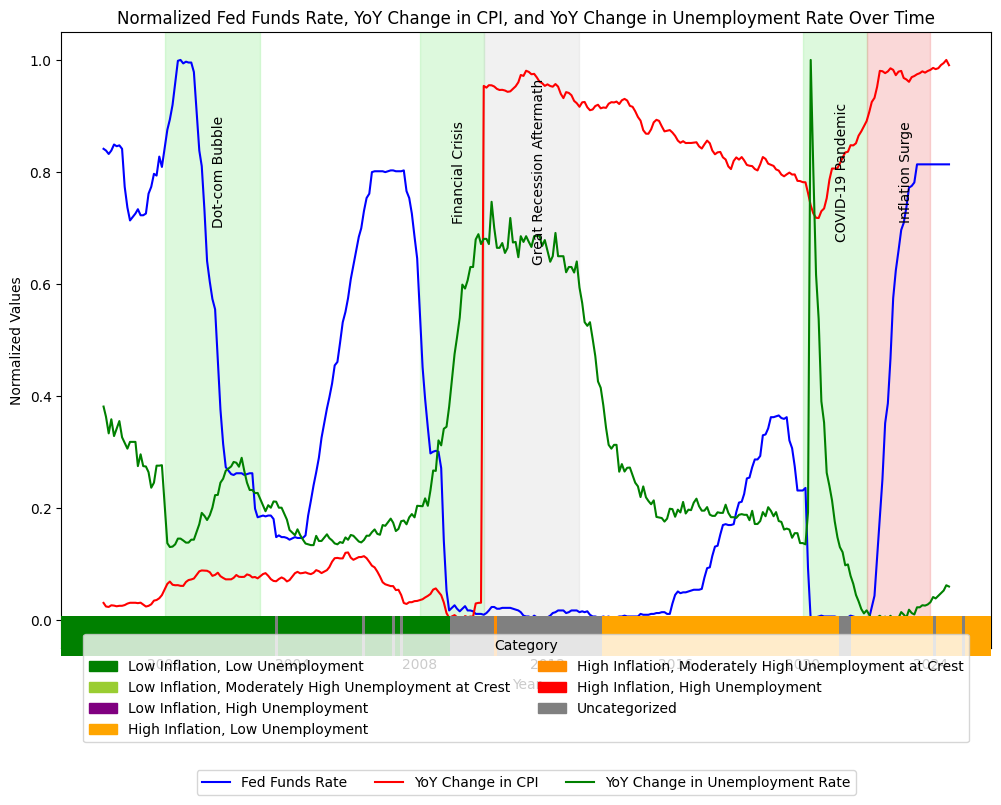

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from scipy.signal import argrelextrema

# Load the datasets
cpi_df = pd.read_csv('/content/CPI_not_seasonally_adjusted.csv')
fed_rate_df = pd.read_csv('/content/FED FUNDS RATE.csv')
unemployment_df = pd.read_csv('/content/Unemployment_rate.csv')

# Reshape CPI data to long format and handle special cases
cpi_long = pd.melt(cpi_df, id_vars='Year', var_name='Month', value_name='CPI')
cpi_long = cpi_long[~cpi_long['Month'].isin(['HALF1', 'HALF2'])]
cpi_long['Date'] = pd.to_datetime(cpi_long['Year'].astype(str) + '-' + cpi_long['Month'], format='%Y-%b')

# Calculate YoY percentage change for CPI
cpi_long['YoY_Change_CPI'] = cpi_long['CPI'].pct_change(12) * 100
cpi_long = cpi_long.dropna(subset=['YoY_Change_CPI'])

# Reshape Unemployment data to long format
unemployment_long = pd.melt(unemployment_df, id_vars='Year', var_name='Month', value_name='Unemployment Rate')
unemployment_long['Date'] = pd.to_datetime(unemployment_long['Year'].astype(str) + '-' + unemployment_long['Month'], format='%Y-%b')

# Calculate YoY percentage change for Unemployment Rate
unemployment_long['YoY_Change_Unemployment'] = unemployment_long['Unemployment Rate'].pct_change(12) * 100
unemployment_long = unemployment_long.dropna(subset=['YoY_Change_Unemployment'])

# Convert the DATE column in fed_rate_df to datetime64[ns]
fed_rate_df['DATE'] = pd.to_datetime(fed_rate_df['DATE'])

# Merge datasets
merged_df = pd.merge(cpi_long[['Date', 'YoY_Change_CPI']], unemployment_long[['Date', 'YoY_Change_Unemployment']], on='Date')
merged_df = pd.merge(merged_df, fed_rate_df[['DATE', 'FEDFUNDS']], left_on='Date', right_on='DATE')
merged_df.drop(columns=['DATE'], inplace=True)
merged_df = merged_df.sort_values(by='Date')

# Normalize the Fed Funds Rate, YoY Change in CPI, and YoY Change in Unemployment Rate using MinMaxScaler
scaler = MinMaxScaler()
merged_df[['FEDFUNDS', 'YoY_Change_CPI', 'YoY_Change_Unemployment']] = scaler.fit_transform(merged_df[['FEDFUNDS', 'YoY_Change_CPI', 'YoY_Change_Unemployment']])

# Detect crests in the unemployment rate
crests = argrelextrema(merged_df['YoY_Change_Unemployment'].values, comparator=lambda x, y: x > y, order=12)[0]

# Define categories including "Moderately High Unemployment at Crest"
def categorize(row, crests_indices):
    if row.name in crests_indices:
        if row['YoY_Change_CPI'] > 0.5 and row['YoY_Change_Unemployment'] > 0.75:
            return 'High Inflation, High Unemployment'
        elif row['YoY_Change_CPI'] > 0.5 and 0.5 < row['YoY_Change_Unemployment'] <= 0.75:
            return 'High Inflation, Moderately High Unemployment at Crest'
        elif row['YoY_Change_CPI'] <= 0.5 and row['YoY_Change_Unemployment'] > 0.75:
            return 'Low Inflation, High Unemployment'
        elif row['YoY_Change_CPI'] <= 0.5 and 0.5 < row['YoY_Change_Unemployment'] <= 0.75:
            return 'Low Inflation, Moderately High Unemployment at Crest'
    else:
        if row['YoY_Change_CPI'] > 0.5 and row['YoY_Change_Unemployment'] <= 0.5:
            return 'High Inflation, Low Unemployment'
        elif row['YoY_Change_CPI'] <= 0.5 and row['YoY_Change_Unemployment'] <= 0.5:
            return 'Low Inflation, Low Unemployment'
    return 'Uncategorized'

merged_df['Category'] = merged_df.apply(categorize, axis=1, crests_indices=crests)

# Create a color map based on the categories
color_map = {
    'Low Inflation, Low Unemployment': 'green',
    'Low Inflation, Moderately High Unemployment at Crest': 'yellowgreen',
    'Low Inflation, High Unemployment': 'purple',
    'High Inflation, Low Unemployment': 'orange',
    'High Inflation, Moderately High Unemployment at Crest': 'darkorange',
    'High Inflation, High Unemployment': 'red',
    'Uncategorized': 'grey'
}

merged_df['Category_Color'] = merged_df['Category'].map(color_map)

# Create the plot
fig, ax1 = plt.subplots(figsize=(12, 8))

# Plot each time series
ax1.plot(merged_df['Date'], merged_df['FEDFUNDS'], color='blue', label='Fed Funds Rate')
ax1.plot(merged_df['Date'], merged_df['YoY_Change_CPI'], color='red', label='YoY Change in CPI')
ax1.plot(merged_df['Date'], merged_df['YoY_Change_Unemployment'], color='green', label='YoY Change in Unemployment Rate')

# Add highlights
highlight_periods = [
    ('2000-01-01', '2002-12-31', 'Dot-com Bubble', 'lightgreen'),
    ('2008-01-01', '2009-12-31', 'Financial Crisis', 'lightgreen'),
    ('2010-01-01', '2012-12-31', 'Great Recession Aftermath', 'lightgrey'),
    ('2020-01-01', '2021-12-31', 'COVID-19 Pandemic', 'lightgreen'),
    ('2022-01-01', '2024-01-01', 'Inflation Surge', 'lightcoral')
]

for start, end, label, color in highlight_periods:
    ax1.axvspan(pd.to_datetime(start), pd.to_datetime(end), color=color, alpha=0.3)
    ax1.text(pd.to_datetime(start) + (pd.to_datetime(end) - pd.to_datetime(start)) / 2,
             0.8, label, rotation=90, verticalalignment='center')

# Set labels and title
ax1.set_xlabel('Year')
ax1.set_ylabel('Normalized Values')
ax1.set_title('Normalized Fed Funds Rate, YoY Change in CPI, and YoY Change in Unemployment Rate Over Time')
ax1.legend(loc='lower center', bbox_to_anchor=(0.5, -0.25), ncol=3)

# Add a border around the plot
for spine in ax1.spines.values():
    spine.set_visible(True)

# Create heatmap strip at the bottom for the categories
heatmap_height = 0.05
ax2 = fig.add_axes([0.125, 0.1, 0.775, heatmap_height])  # [left, bottom, width, height]
for i in range(len(merged_df) - 1):
    ax2.axvspan(merged_df['Date'].iloc[i], merged_df['Date'].iloc[i+1], color=merged_df['Category_Color'].iloc[i], lw=0)
ax2.set_xlim([merged_df['Date'].min(), merged_df['Date'].max()])
ax2.axis('off')

# Create custom legend for the category colors
category_patches = [Patch(color=color_map[key], label=key) for key in color_map.keys()]

# Adjust the legend's position
plt.legend(handles=category_patches, title="Category", loc='center', bbox_to_anchor=(0.5, -0.8), ncol=2)

plt.show()


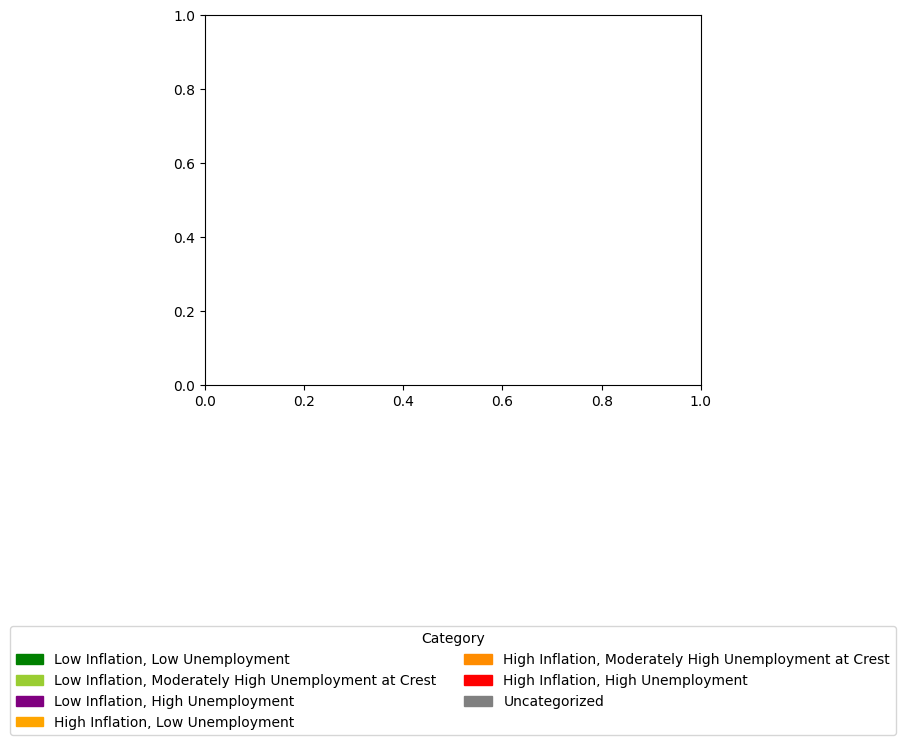

In [14]:
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

# Assuming the previous parts of the code have been run and merged_df is prepared

# Create heatmap strip at the bottom for the categories
heatmap_height = 0.05
ax2 = fig.add_axes([0.125, 0.1, 0.775, heatmap_height])  # [left, bottom, width, height]
for i in range(len(merged_df) - 1):
    ax2.axvspan(merged_df['Date'].iloc[i], merged_df['Date'].iloc[i+1], color=merged_df['Category_Color'].iloc[i], lw=0)
ax2.set_xlim([merged_df['Date'].min(), merged_df['Date'].max()])
ax2.axis('off')

# Create custom legend for the category colors
category_patches = [Patch(color=color_map[key], label=key) for key in color_map.keys()]

# Adjust the legend's position
plt.legend(handles=category_patches, title="Category", loc='center', bbox_to_anchor=(0.5, -0.8), ncol=2)

plt.show()
